# Projeto 1 - Introdução a Redes Neurais Artificiais
- Guilherme Araújo Mendes de Souza - 156437
- Renata Moura Barreto - 163983

Implementação e avaliação de um modelo de classificação utilizando uma rede neural do tipo MLP (Perceptron Multicamadas) em Python, desenvolvida do zero, sem o uso de bibliotecas prontas como PyTorch ou TensorFlow.

## Doenças do Coração

As doenças cardiovasculares são a principal causa de morte no mundo, representando 31% dos óbitos globais, com ataques cardíacos e derrames sendo responsáveis pela maioria das mortes. Este conjunto de dados contém 11 variáveis que podem ajudar a prever doenças cardíacas, contribuindo para a detecção precoce e o manejo de pessoas com DCVs ou em alto risco, onde modelos de aprendizado de máquina podem ser ferramentas valiosas.

### Descrição do Dataset

Este conjunto de dados foi criado a partir da combinação de diferentes conjuntos de dados que estavam disponíveis de forma independente, mas ainda não haviam sido combinados. Ele reúne 5 conjuntos de dados cardíacos com 11 características comuns, tornando-se o maior conjunto de dados sobre doenças cardíacas disponível até agora para fins de pesquisa. Os cinco conjuntos de dados utilizados na sua criação são:

- Cleveland: 303 observações
- Hungarian: 294 observações
- Switzerland: 123 observações
- Long Beach VA: 200 observações
- Stalog (Heart) Data Set: 270 observações

Total: 1190 observações
Duplicadas: 272 observações

[Dataset disponível no Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)

### Visão Geral do Dataset

- **Age**: idade do paciente [anos]  
- **Sex**: sexo do paciente [M: Masculino, F: Feminino]  
- **ChestPainType**: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomático]  
- **RestingBP**: pressão arterial em repouso [mm Hg]  
- **Cholesterol**: colesterol sérico [mg/dl]  
- **FastingBS**: glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]  
- **RestingECG**: resultados do eletrocardiograma em repouso [Normal: Normal, ST: anomalia na onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), LVH: hipertrofia ventricular esquerda provável ou definitiva segundo os critérios de Estes]  
- **MaxHR**: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]  
- **ExerciseAngina**: angina induzida por exercício [Y: Sim, N: Não]  
- **Oldpeak**: oldpeak = ST [Valor numérico medido em depressão]  
- **ST_Slope**: inclinação do segmento ST durante o exercício [Up: ascendente, Flat: plana, Down: descendente]  
- **HeartDisease**: classe de saída [1: doença cardíaca, 0: Normal]  


### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from perceptron import MLP
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Carregamento dos dados

In [2]:
df_p1 = pd.read_csv('../data/heart.csv')

### Análise Inicial

In [3]:
df_p1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df_p1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


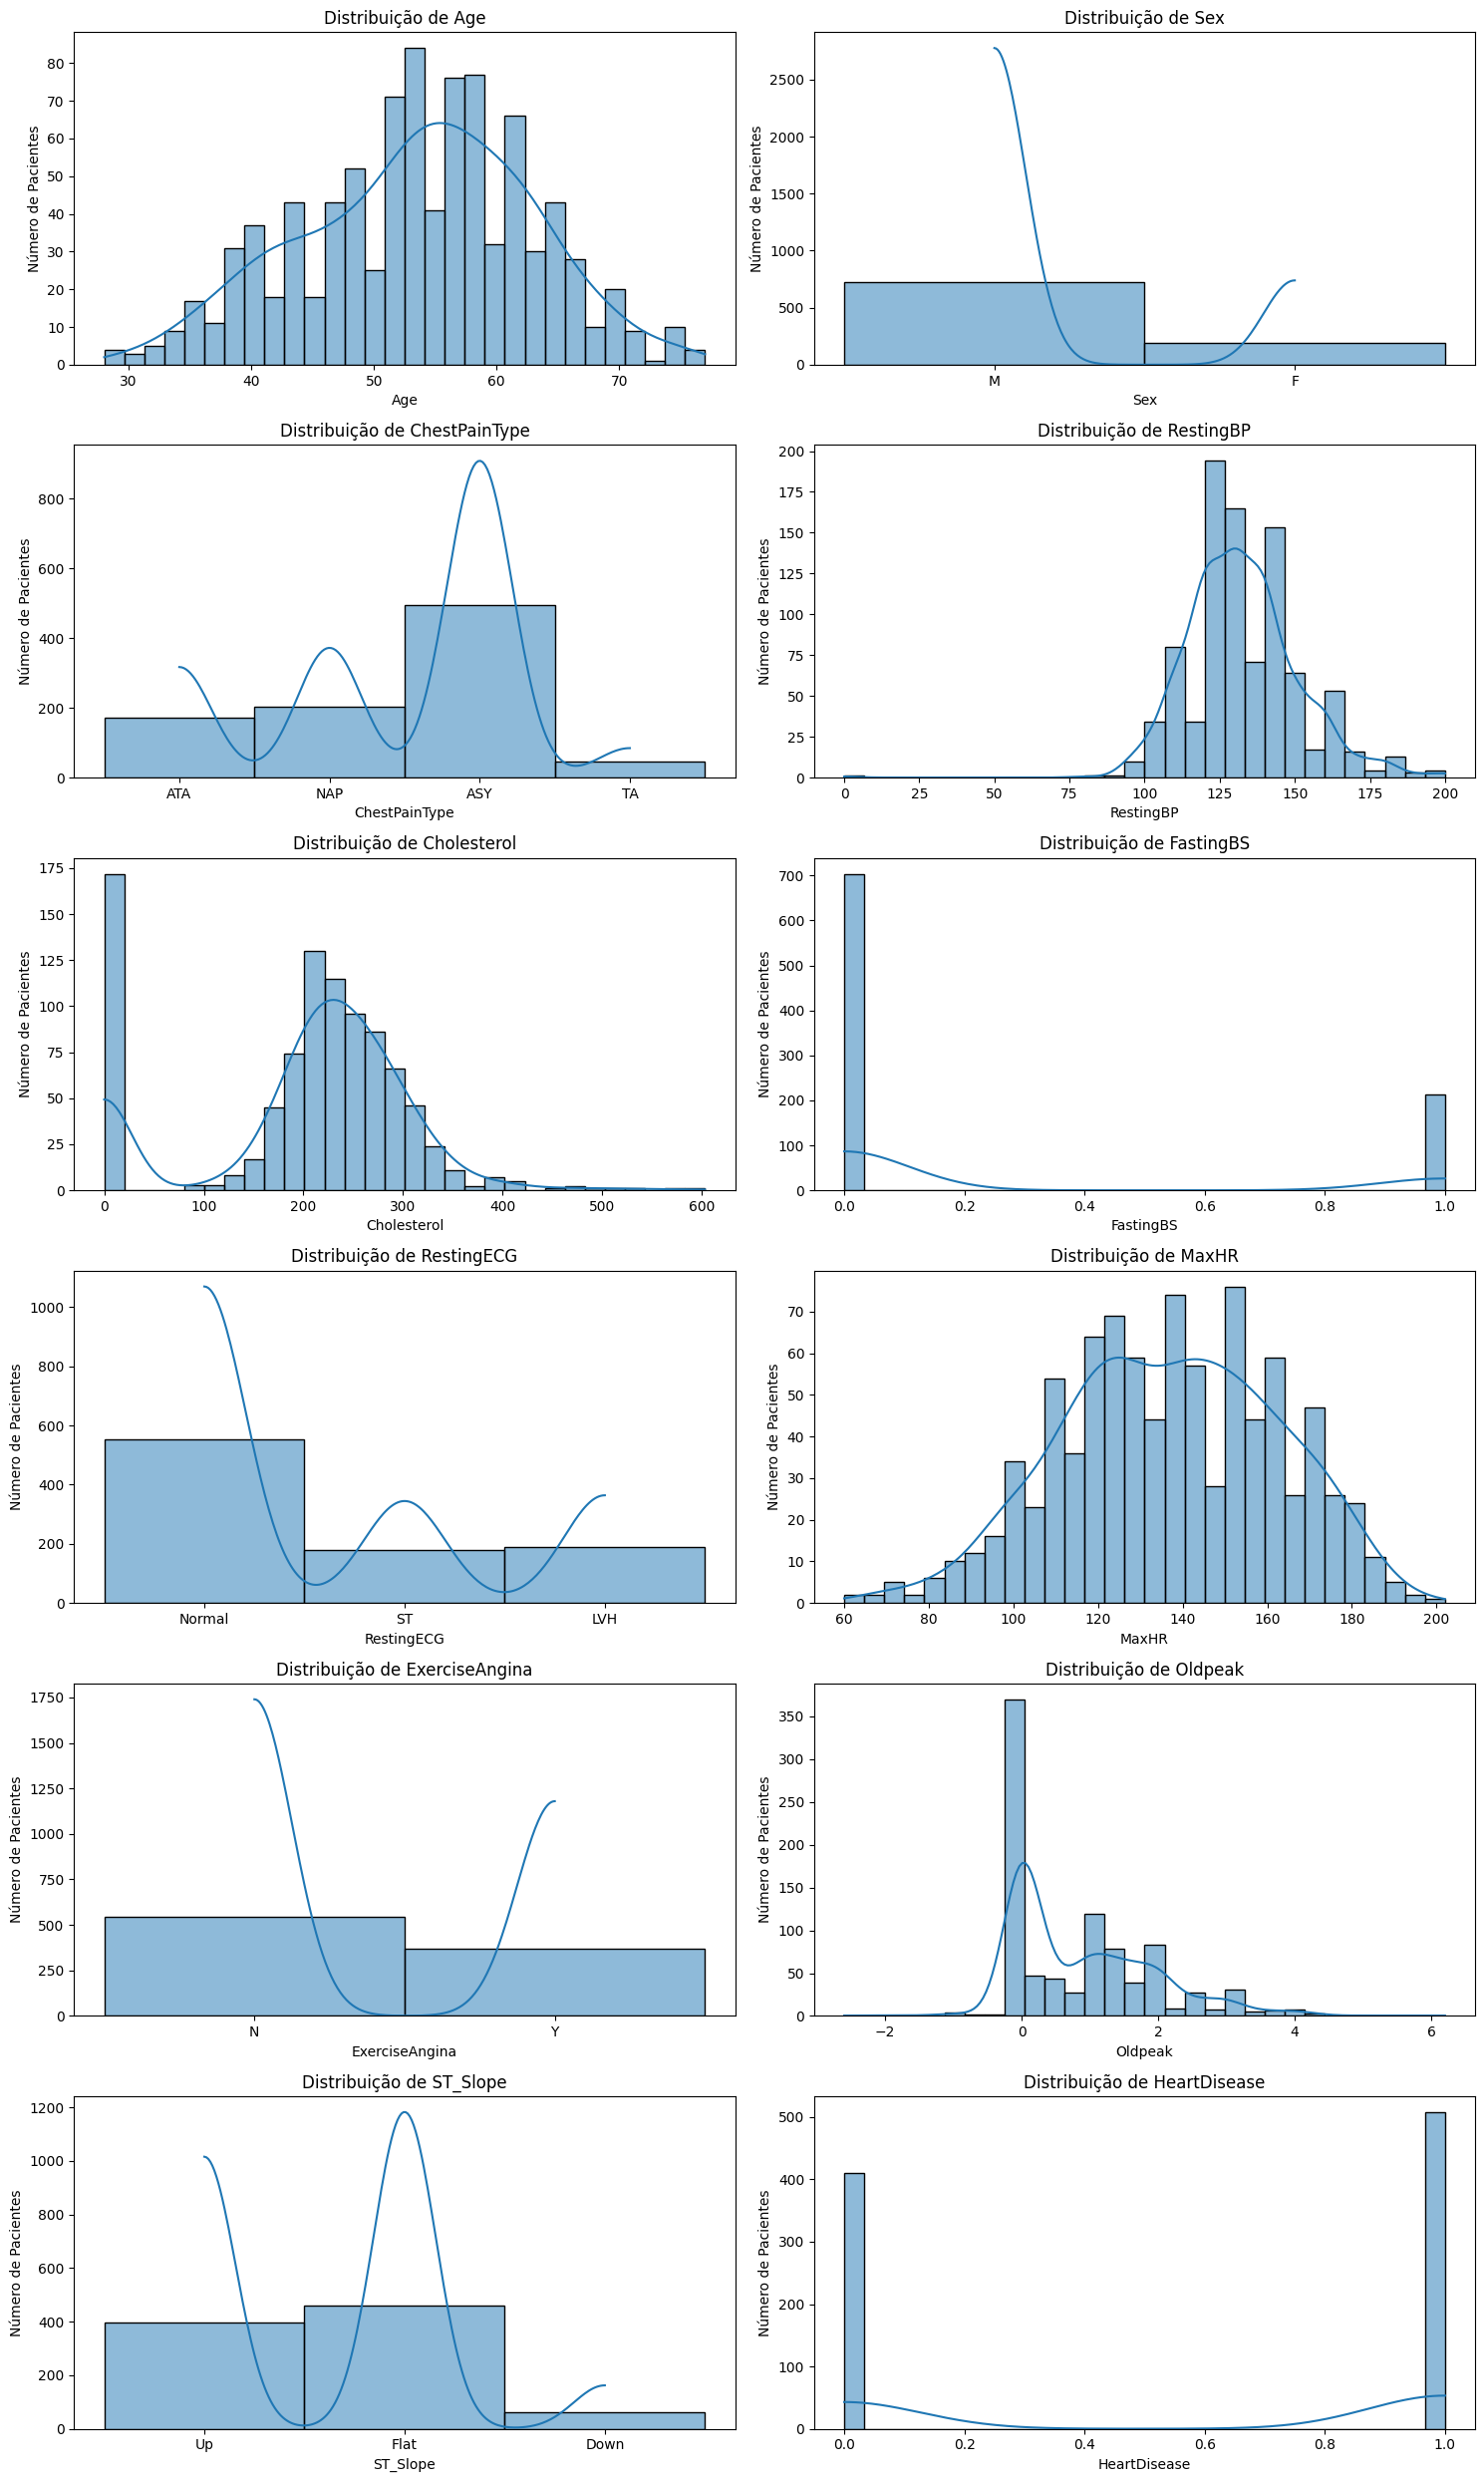

In [6]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))

for i, column in enumerate(df_p1.columns[:12]):
    row = i // 2 
    col = i % 2 
    sns.histplot(df_p1[column], bins=30, ax=axes[row, col], kde=True) 
    axes[row, col].set_ylabel('Número de Pacientes')
    axes[row, col].set_title(f'Distribuição de {column}')

plt.tight_layout() 
plt.show()

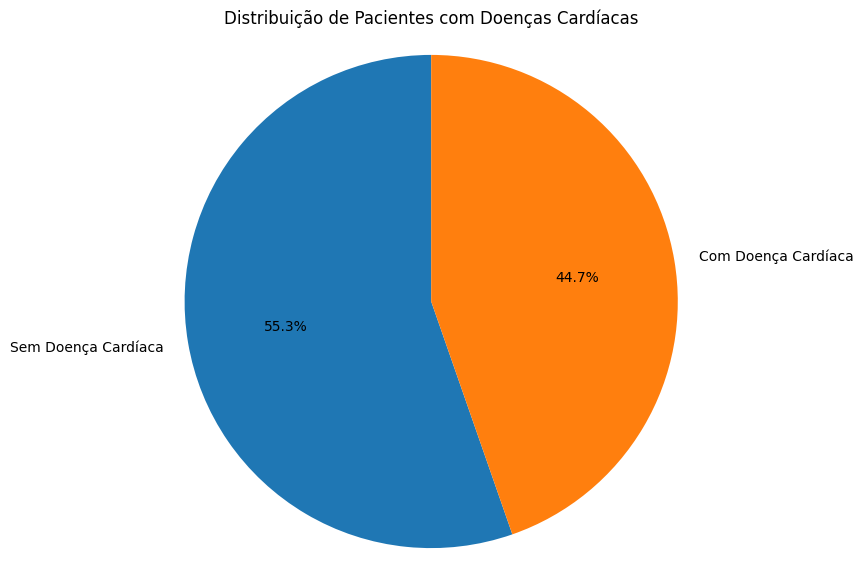

In [7]:
plt.figure(figsize=(7, 7))
plt.pie(
    df_p1['HeartDisease'].value_counts(),
    labels=['Sem Doença Cardíaca', 'Com Doença Cardíaca'],
    autopct='%1.1f%%',
    startangle=90 
)
plt.title('Distribuição de Pacientes com Doenças Cardíacas')
plt.axis('equal') 
plt.show()

### Limpeza e Tratamento dos Dados

In [8]:
df_p1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Tratamento das variaveis categorigas
df = pd.get_dummies(df_p1, columns=['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG'], drop_first=True)

In [10]:
label_encoder = LabelEncoder()
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [11]:
print(df.dtypes)

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
ST_Slope               int32
HeartDisease           int64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
ExerciseAngina_Y        bool
RestingECG_Normal       bool
RestingECG_ST           bool
dtype: object


In [12]:
df= df.astype(int)

In [13]:
print(df.dtypes)

Age                  int32
RestingBP            int32
Cholesterol          int32
FastingBS            int32
MaxHR                int32
Oldpeak              int32
ST_Slope             int32
HeartDisease         int32
Sex_M                int32
ChestPainType_ATA    int32
ChestPainType_NAP    int32
ChestPainType_TA     int32
ExerciseAngina_Y     int32
RestingECG_Normal    int32
RestingECG_ST        int32
dtype: object


### Análise Exploratória de Dados (EDA)

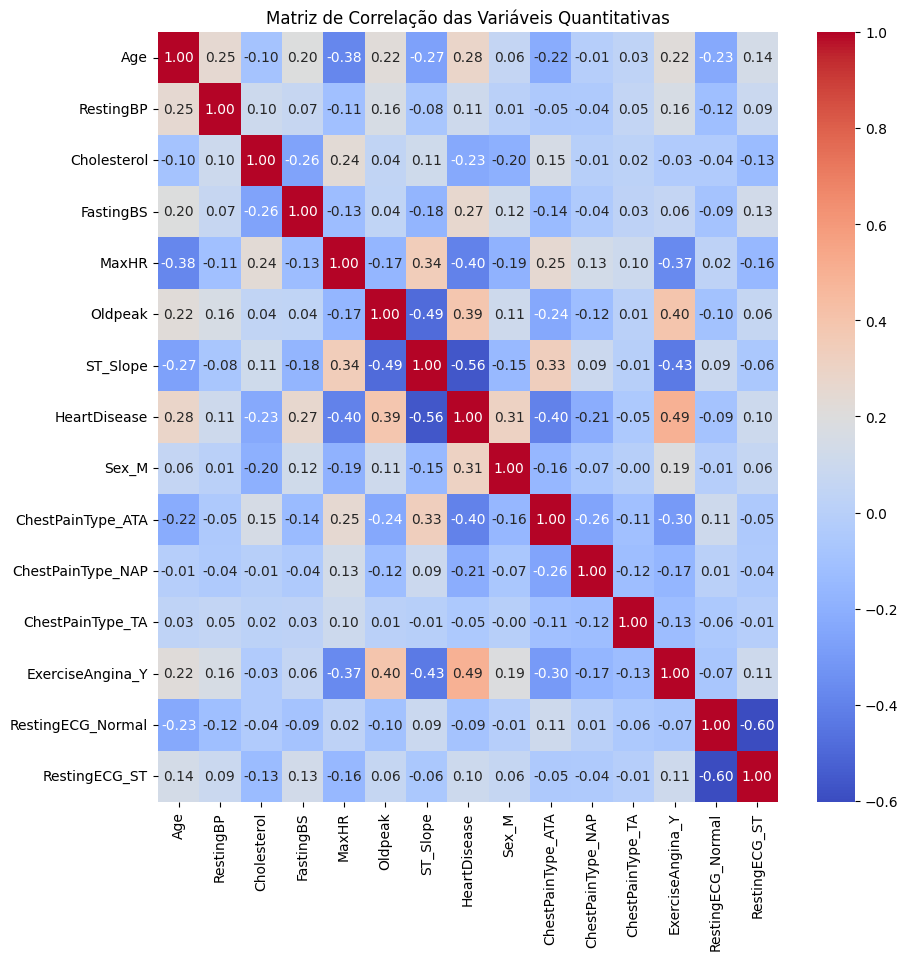

In [14]:
# Matriz de correlação
numeric_columns = df.select_dtypes(include=['int32'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

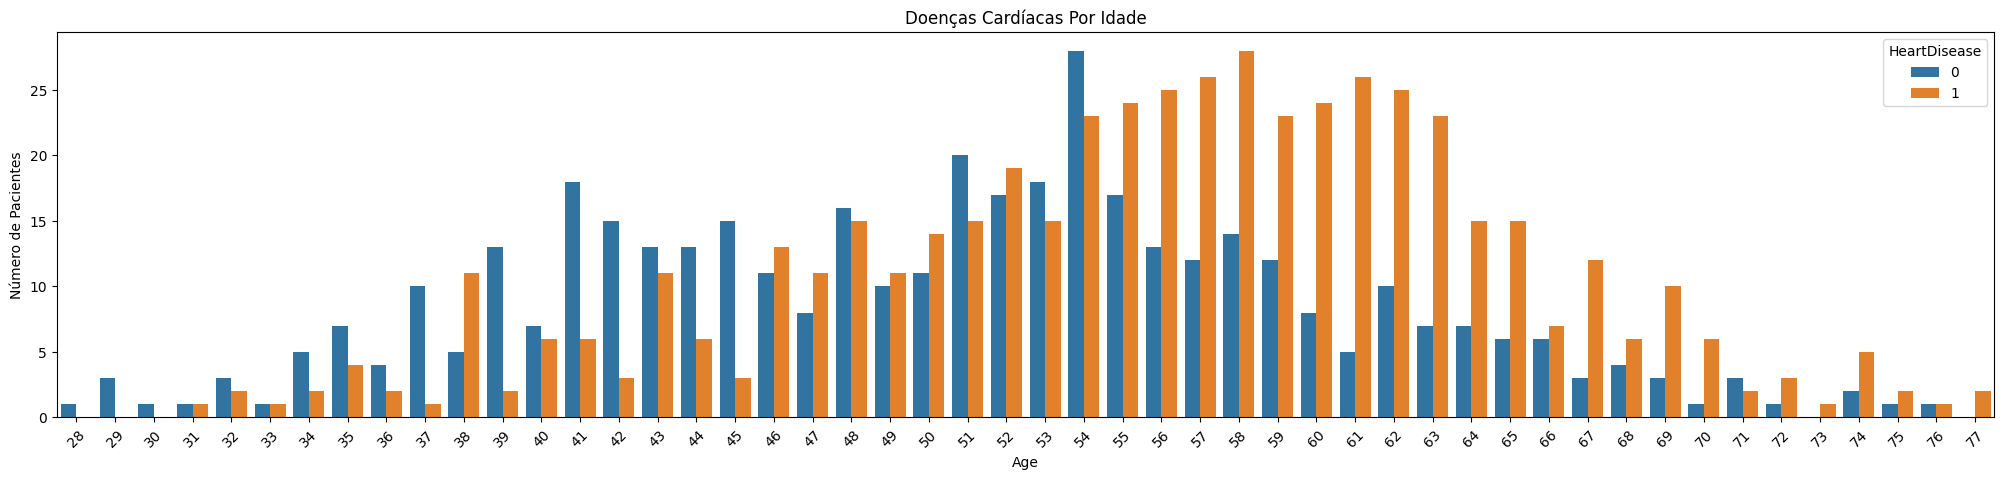

In [15]:
plt.figure(figsize=(25, 5))
sns.countplot(x="Age", data=df, hue='HeartDisease')
plt.ylabel('Número de Pacientes')
plt.title('Doenças Cardíacas Por Idade')
plt.xticks(rotation=45)
plt.show()

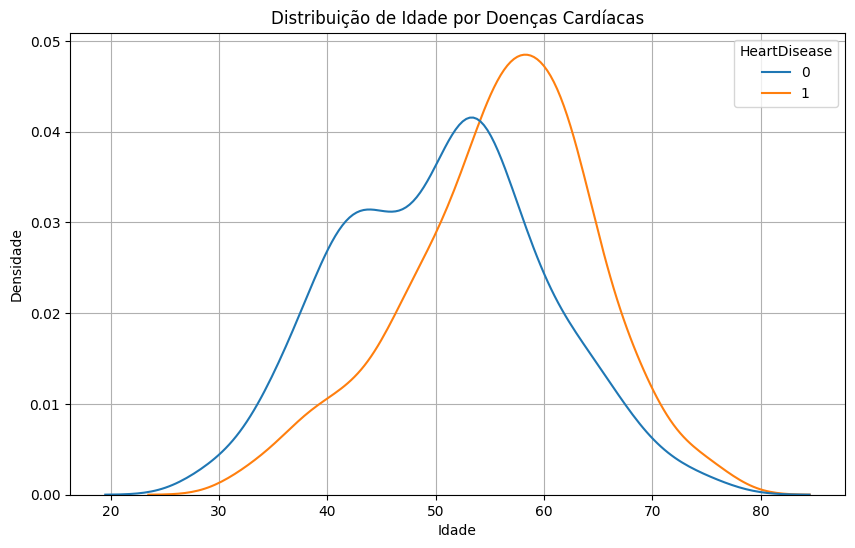

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='HeartDisease', fill=False, common_norm=False)
plt.title('Distribuição de Idade por Doenças Cardíacas')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.grid()
plt.show()

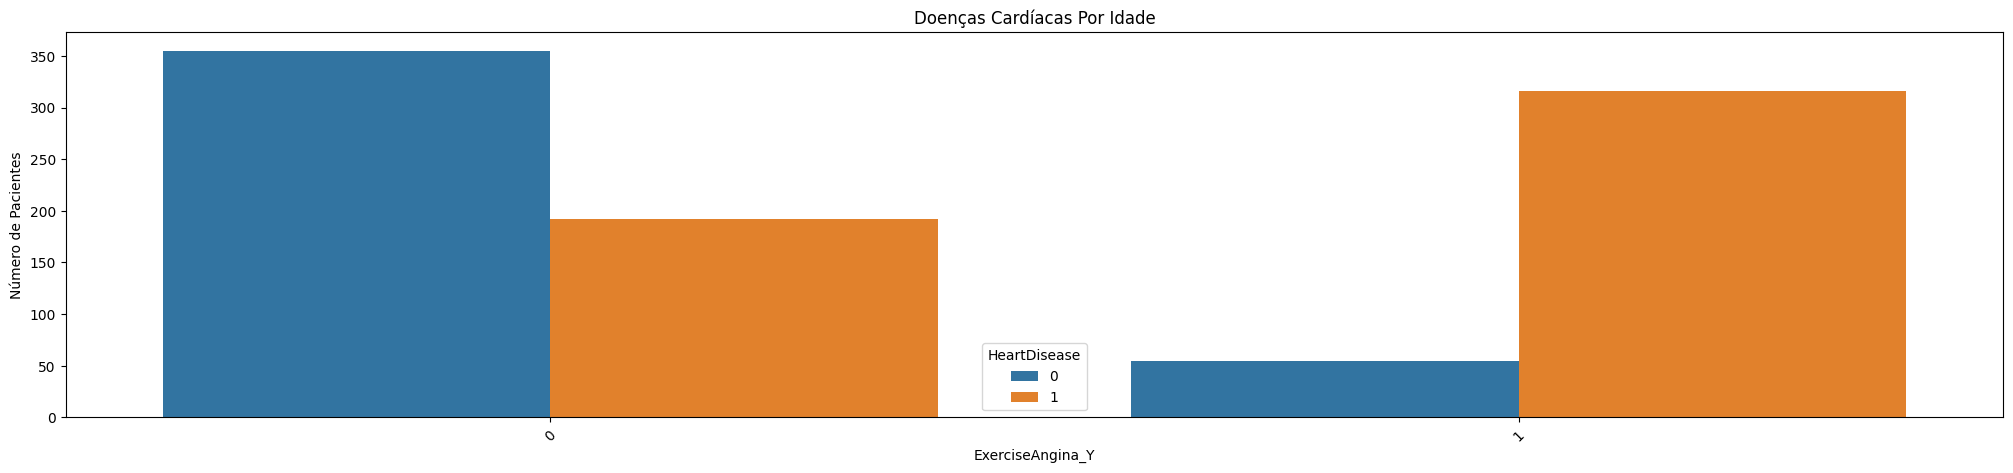

In [17]:
plt.figure(figsize=(25, 5))
sns.countplot(x="ExerciseAngina_Y", data=df, hue='HeartDisease')
plt.ylabel('Número de Pacientes')
plt.title('Doenças Cardíacas Por Idade')
plt.xticks(rotation=45)
plt.show()

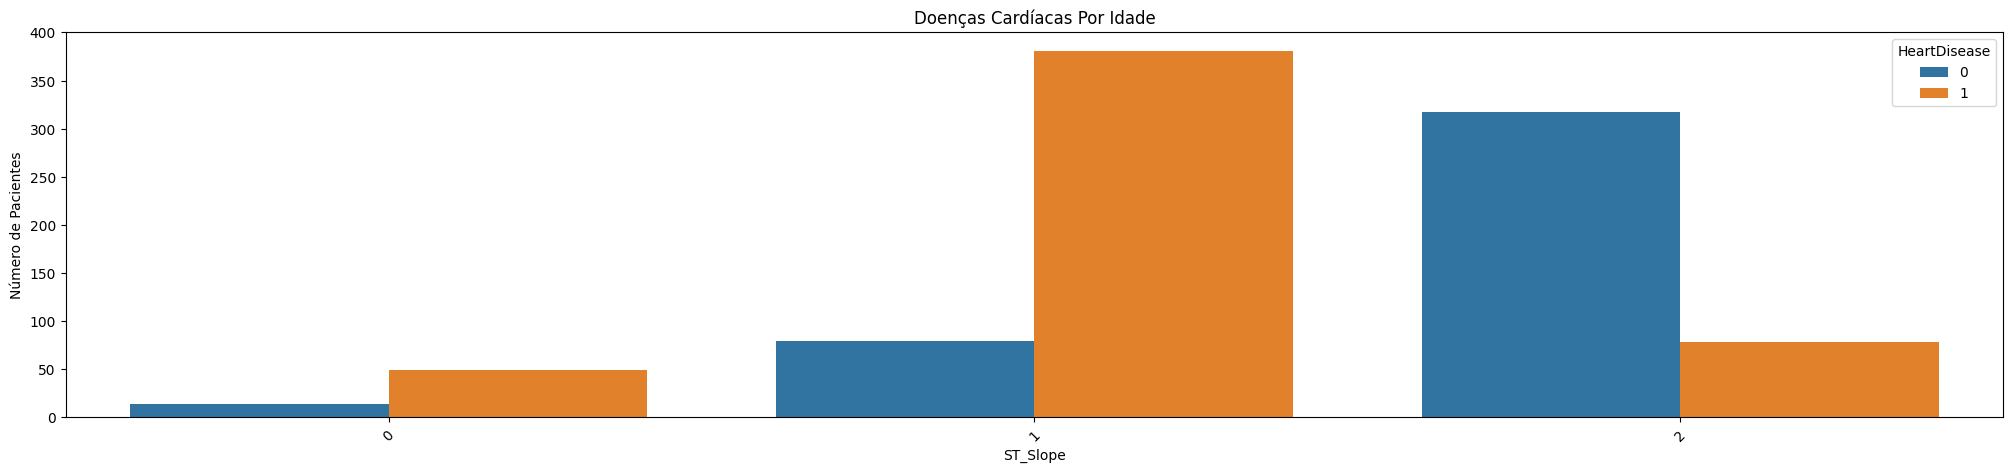

In [18]:
plt.figure(figsize=(25, 5))
sns.countplot(x="ST_Slope", data=df, hue='HeartDisease')
plt.ylabel('Número de Pacientes')
plt.title('Doenças Cardíacas Por Idade')
plt.xticks(rotation=45)
plt.show()

### Pré-Processamento dos Dados

In [19]:
X = df.drop(columns=["HeartDisease"]).values
y = df["HeartDisease"].values

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Treinamento do Modelo

### Avaliação do Modelo

#### Configuração do melhor modelo:
- n_hidden = 5
- n_outputs = 2
- learning_rate = 0.005
- activation = sigmoid
- regularization=0.001
- epochs = 1000
- patience = 20


In [33]:
mlp_classifier = MLP(n_inputs=14, n_hidden=5, n_outputs=2, learning_rate=0.005, activation="sigmoid", regularization=0.001)
mlp_classifier.fit(X_train, y_train, epochs=1000, patience=20)

predictions = mlp_classifier.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
print("Acurácia da classificação:", accuracy_score(true_classes, predicted_classes))

Epoch 0: Loss 0.2501718115821477, Max Weight Hidden 0.022337622953894534, Max Weight Output 0.02371238295347308
Epoch 100: Loss 0.10023110312476405, Max Weight Hidden 1.5521528774023654, Max Weight Output 1.618247614803073
Epoch 200: Loss 0.09392974336783701, Max Weight Hidden 2.600926855543132, Max Weight Output 2.170696596026958
Epoch 300: Loss 0.08695711506708814, Max Weight Hidden 3.076155221196993, Max Weight Output 2.5956022246012522
Epoch 400: Loss 0.08394120130591043, Max Weight Hidden 3.3762536426126735, Max Weight Output 2.8206279567958634
Epoch 500: Loss 0.08227235838985425, Max Weight Hidden 3.5173774187264257, Max Weight Output 2.9589555794403886
Epoch 600: Loss 0.08135759290026787, Max Weight Hidden 3.5513367985344027, Max Weight Output 3.013794375233559
Epoch 700: Loss 0.08071179500878195, Max Weight Hidden 3.562700049639493, Max Weight Output 3.044990958917178
Epoch 800: Loss 0.08038304764571988, Max Weight Hidden 3.564544527865656, Max Weight Output 3.0497706805574927


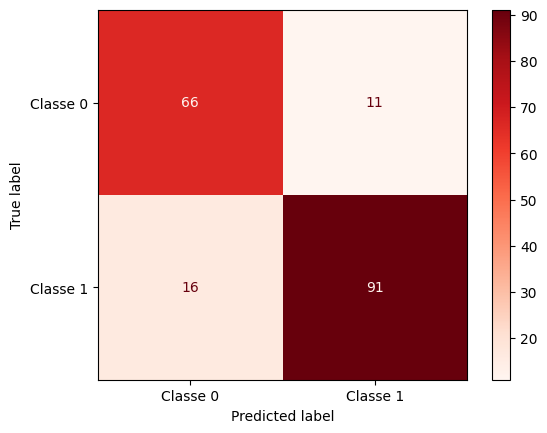

In [34]:
#matriz de confusão
cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap="Reds") 

In [35]:
# Métricas de avaliação
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão (Precision): {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(true_classes, predicted_classes, target_names=["Classe 0", "Classe 1"]))


Acurácia: 0.85
Precisão (Precision): 0.89
Recall: 0.85
F1-Score: 0.87

Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.80      0.86      0.83        77
    Classe 1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



### Conclusão

Neste trabalho, foi desenvolvida uma Rede Neural MLP do zero, sem o uso de bibliotecas prontas, para realizar uma tarefa de classificação de doenças cardíacas. Diversas configurações de hiperparâmetros foram testadas, incluindo o número de neurônios na camada oculta, taxa de aprendizado, função de ativação,  regularização, número de épocas e críterio de parada.

Os resultados indicaram que o desempenho do modelo é sensível às configurações escolhidas. A melhor acurácia obtida foi de 86.41%, utilizando 5 neurônios na camada oculta, taxa de aprendizado de 0.005, função de ativação sigmoid, regularização de 0.001, número de épocas 1000 e críterio de parada 20. Por outro lado, ao aumentar o número de neurônios para 15, a acurácia caiu para 79.89%, possivelmente devido à maior complexidade do modelo, que pode ter levado a uma menor generalização. E ao aumentar a taxa de aprendizado para 0.010 e 0.015, a acurácia caiu reesectivaentee para 66.30% e 58.15, possivelmente devido à instabilidade no processo de otimização causada por uma taxa de aprendizado muito alta.

O trabalho permitiu uma compreensão aprofundada da implementação de uma Rede Neural MLP e da importância da escolha criteriosa de hiperparâmetros no desempenho final do modelo.